In [229]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt


import numpy as np
import pandas as pd
import matplotlib.pylab as plt
path=r"C:\Users\Enis\Downloads"
path = path.replace("\u202a", "").replace("\u202c", "")

df =pd.read_excel(path)
df
df.info()
print("Tekrar eden satır sayısı:", df.duplicated().sum())
df= df.drop_duplicates()
df['TedaviSuresi_Sayi'] = pd.to_numeric(df['TedaviSuresi'].str.extract('(\\d+)')[0], errors='coerce')

df['UygulamaSuresi_Sayi'] = pd.to_numeric(df['UygulamaSuresi'].str.extract('(\\d+)')[0], errors='coerce')
print("\n--- Eksik Değer Sayıları ---")
print(df.isnull().sum())
sns.set(style="whitegrid")
df = df.copy()
df.loc[:, 'TedaviSuresi_Numerical'] = pd.to_numeric(df['TedaviSuresi'].str.extract('(\\d+)')[0], errors='coerce')
df = df.dropna(subset=['TedaviSuresi_Numerical'])
plt.figure(figsize=(14, 8))
ax = sns.countplot(y=df['TedaviSuresi_Numerical'], order=df['TedaviSuresi_Numerical'].value_counts().index)
plt.title('Tedavi Seansı Sayılarının Dağılımı', fontsize=16)
plt.xlabel('Tekrar Sayısı (Frekans)', fontsize=12)
plt.ylabel('Seans Sayısı', fontsize=12)
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 10, p.get_y() + p.get_height() / 2, '{:1.0f}'.format(width), ha='left', va='center')
plt.tight_layout()
plt.show()

# Yaş dağılımını bir histogram ile görselleştiriyoruz.
plt.figure(figsize=(10, 6))
sns.histplot(df['Yas'].dropna(), kde=True, bins=30)
plt.title('Hasta Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show() # Grafiği ekranda göster
# Cinsiyet ve Tedavi Süresi arasındaki ilişkiyi bir kutu grafiği ile inceliyoruz.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cinsiyet', y='TedaviSuresi_Numerical', data=df)
plt.title('Cinsiyete Göre Tedavi Süresi Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Tedavi Süresi (Seans)')
plt.show()
# Sadece sayısal sütunları seçip korelasyon matrisini hesaplıyoruz.
numerical_cols = df.select_dtypes(include=np.number)
correlation_matrix = numerical_cols.corr()

# Korelasyon matrisini bir ısı haritası ile görselleştiriyoruz.
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sayısal Değişkenler Arasındaki Korelasyon Matrisi')
plt.show()

In [240]:
path=r"C:\Users\Enis\Downloads\projectpus.xlsx"
path = path.replace("\u202a", "").replace("\u202c", "")

df =pd.read_excel(path)
df

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,145536,48,Erkek,NaN,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,10 Dakika
2231,145536,48,Erkek,NaN,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,20 Dakika
2232,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,​Algonörodistrofi,​ ay...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,20 Dakika
2233,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,Algonörodistrofi, ayak...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,15 Dakika


In [241]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [242]:
print("Tekrar eden satır sayısı:", df.duplicated().sum())


Tekrar eden satır sayısı: 928


In [243]:
df= df.drop_duplicates()

In [250]:
df['TedaviSuresi_Sayi'] = pd.to_numeric(df['TedaviSuresi'].str.extract('(\\d+)')[0], errors='coerce')

df['UygulamaSuresi_Sayi'] = pd.to_numeric(df['UygulamaSuresi'].str.extract('(\\d+)')[0], errors='coerce')


In [245]:
df

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,TedaviSuresi_Sayi,UygulamaSuresi_Sayi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika,5,20
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika,15,20
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika,15,20
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika,15,5
6,145136,60,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10 Seans,NaN,30 Dakika,10,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,145536,48,Erkek,NaN,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,20 Dakika,15,20
2230,145536,48,Erkek,NaN,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,10 Dakika,15,10
2232,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,​Algonörodistrofi,​ ay...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,20 Dakika,15,20
2233,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,Algonörodistrofi, ayak...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,15 Dakika,15,15


In [246]:
print("\n--- Eksik Değer Sayıları ---")
print(df.isnull().sum())


--- Eksik Değer Sayıları ---
HastaNo                  0
Yas                      0
Cinsiyet               104
KanGrubu               365
Uyruk                    0
KronikHastalik         345
Bolum                    7
Alerji                 540
Tanilar                 46
TedaviAdi                0
TedaviSuresi             0
UygulamaYerleri        157
UygulamaSuresi           0
TedaviSuresi_Sayi        0
UygulamaSuresi_Sayi      0
dtype: int64


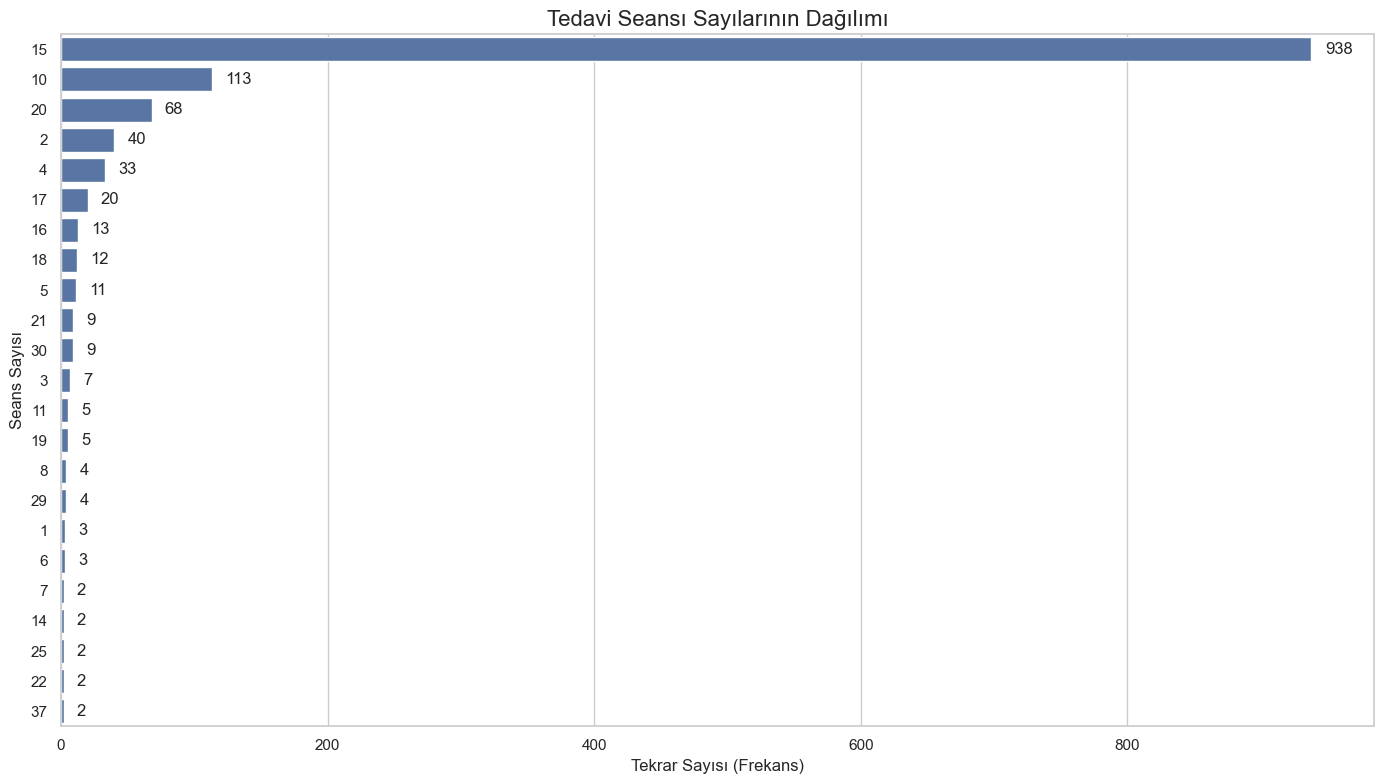

In [247]:
sns.set(style="whitegrid")
df = df.copy()
df.loc[:, 'TedaviSuresi_Numerical'] = pd.to_numeric(df['TedaviSuresi'].str.extract('(\\d+)')[0], errors='coerce')
df = df.dropna(subset=['TedaviSuresi_Numerical'])
plt.figure(figsize=(14, 8))
ax = sns.countplot(y=df['TedaviSuresi_Numerical'], order=df['TedaviSuresi_Numerical'].value_counts().index)
plt.title('Tedavi Seansı Sayılarının Dağılımı', fontsize=16)
plt.xlabel('Tekrar Sayısı (Frekans)', fontsize=12)
plt.ylabel('Seans Sayısı', fontsize=12)
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 10, p.get_y() + p.get_height() / 2, '{:1.0f}'.format(width), ha='left', va='center')
plt.tight_layout()
plt.show()


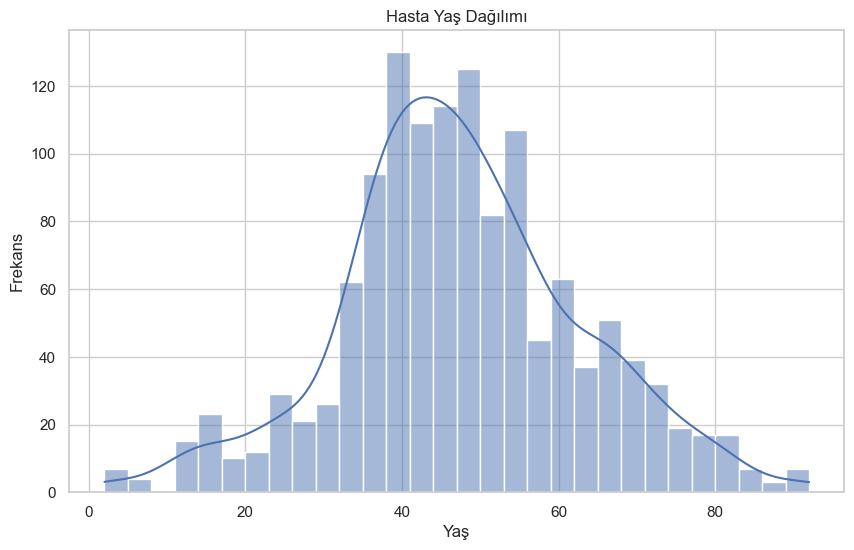

In [248]:
# Yaş dağılımını bir histogram ile görselleştiriyoruz.
plt.figure(figsize=(10, 6))
sns.histplot(df['Yas'].dropna(), kde=True, bins=30)
plt.title('Hasta Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show() # Grafiği ekranda göster

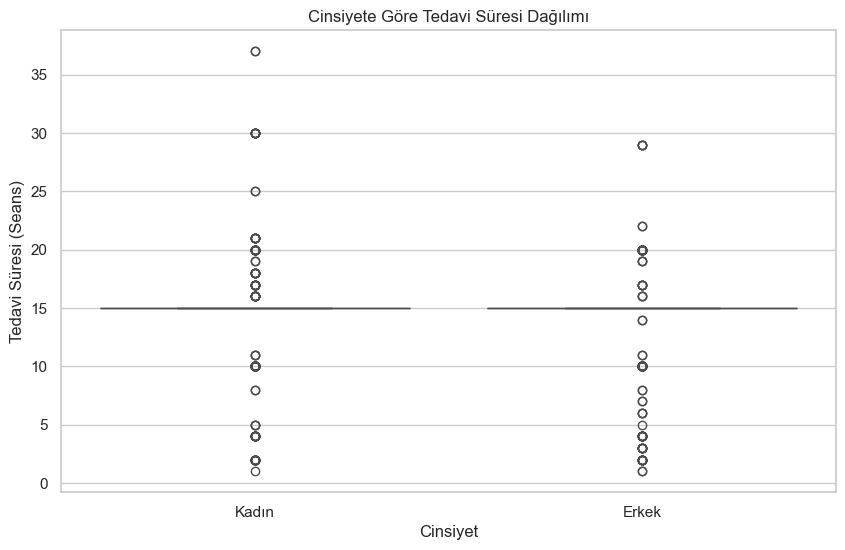

In [249]:
# Cinsiyet ve Tedavi Süresi arasındaki ilişkiyi bir kutu grafiği ile inceliyoruz.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cinsiyet', y='TedaviSuresi_Numerical', data=df)
plt.title('Cinsiyete Göre Tedavi Süresi Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Tedavi Süresi (Seans)')
plt.show()

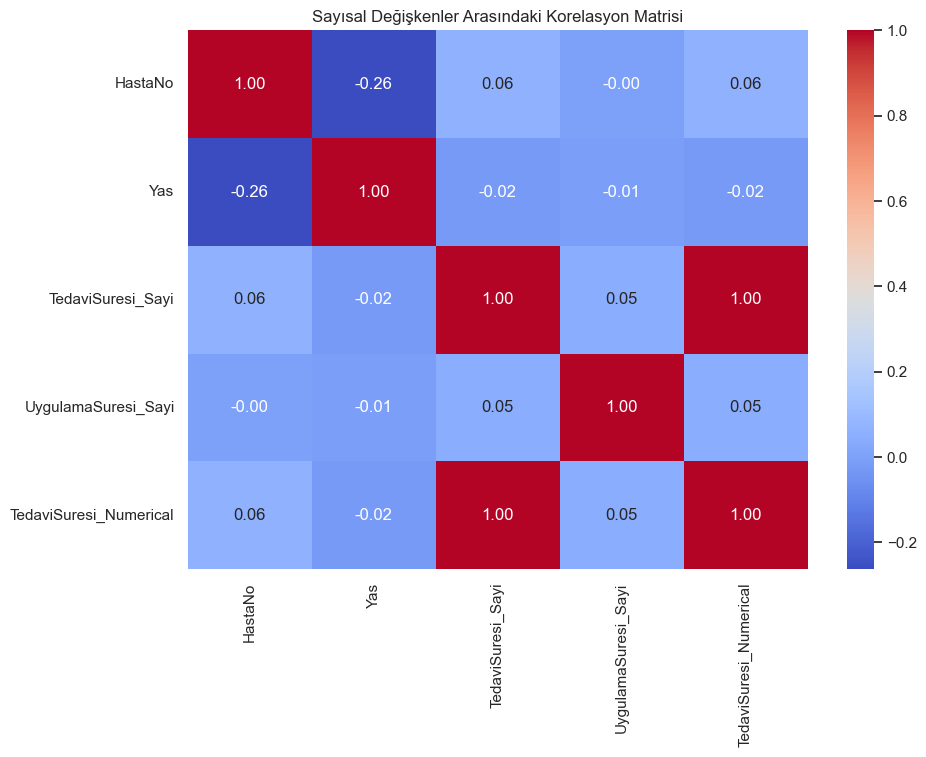

In [239]:
# Sadece sayısal sütunları seçip korelasyon matrisini hesaplıyoruz.
numerical_cols = df.select_dtypes(include=np.number)
correlation_matrix = numerical_cols.corr()

# Korelasyon matrisini bir ısı haritası ile görselleştiriyoruz.
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sayısal Değişkenler Arasındaki Korelasyon Matrisi')
plt.show()